In [45]:
import torch
torch.cuda.set_device(4)
import torch.nn as nn
import torch.nn.functional as f
from torch.optim import *
#datasets & transformation
import torchvision as tv
import torchvision.transforms as transforms

In [46]:
## load dataset & dataloader
train = tv.datasets.MNIST(root='./data/', train = True, transform = transforms.ToTensor(), download = True)
test = tv.datasets.MNIST(root='./data',train=False, transform = transforms.ToTensor(), download = True)

train_loader = torch.utils.data.DataLoader(train,100,True)
test_loader = torch.utils.data.DataLoader(train,100,False)

In [47]:
## create class for classifier with forward pass

class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28*28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512,512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512,10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,28*28)
        # add hidden layer, with relu activation function
        x = f.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = f.relu(self.fc2(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x   

In [62]:
## model object
model = MLP()
model.cuda()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2)
)


In [49]:
loss_001 =[]
acc_001 = []
loss_005 =[]
acc_005 = []
loss_01 =[]
acc_01 = []

loss_SGD=[]
acc_SGD=[]
loss_Adam=[]
acc_Adam=[]

loss_relu=[]
acc_relu=[]
loss_tanh=[]
acc_tanh=[]

accuracy_test_lr = []
accuracy_test_opt = []
accuracy_test_act=[]

In [63]:
## loss & optimizer
loss_type = nn.CrossEntropyLoss()
loss_type.cuda()
optimizer = SGD(model.parameters(),lr=0.01) #0.005, 0.01

In [64]:
##training
import numpy as np
epoch = 20
steps = len(train_loader)

for i in range(epoch):
    total=0
    correct=0
    total_loss=0
    for j,(image,label) in enumerate(train_loader):
        image = image.cuda()
        label = label.cuda()
        output = model(image)
        loss = loss_type(output,label)
       
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,pred = torch.max(output.data,1)
        total += label.size(0)
        correct += (pred==label).sum().item()
        l=loss.item()
        total_loss += l
        
    print('Epoch:{}/{}, Training Loss:{:.2f}, Training Accuracy:{:.2f}'.format(i+1,epoch,total_loss/len(train_loader),100 * correct / total))
        
    loss_01.append(total_loss/len(train_loader))
    acc_01.append(100 * correct / total)  


Epoch:1/20, Training Loss:1.98, Training Accuracy:52.63
Epoch:2/20, Training Loss:0.83, Training Accuracy:79.44
Epoch:3/20, Training Loss:0.52, Training Accuracy:85.30
Epoch:4/20, Training Loss:0.43, Training Accuracy:87.57
Epoch:5/20, Training Loss:0.39, Training Accuracy:88.81
Epoch:6/20, Training Loss:0.36, Training Accuracy:89.66
Epoch:7/20, Training Loss:0.33, Training Accuracy:90.28
Epoch:8/20, Training Loss:0.31, Training Accuracy:90.85
Epoch:9/20, Training Loss:0.30, Training Accuracy:91.44
Epoch:10/20, Training Loss:0.28, Training Accuracy:91.84
Epoch:11/20, Training Loss:0.27, Training Accuracy:92.31
Epoch:12/20, Training Loss:0.25, Training Accuracy:92.69
Epoch:13/20, Training Loss:0.24, Training Accuracy:93.01
Epoch:14/20, Training Loss:0.23, Training Accuracy:93.30
Epoch:15/20, Training Loss:0.22, Training Accuracy:93.61
Epoch:16/20, Training Loss:0.21, Training Accuracy:93.91
Epoch:17/20, Training Loss:0.20, Training Accuracy:94.08
Epoch:18/20, Training Loss:0.20, Trainin

In [65]:
#testing

model.eval()
with torch.no_grad():
    total=0
    correct=0
    
    for j,(im_test,label_test) in enumerate(test_loader):
            im_test=im_test.cuda()
            label_test=label_test.cuda()
            output_test = model(im_test)
            loss_test = loss_type(output_test,label_test)


            _,pred = torch.max(output_test.data,1)
            total += label_test.size(0)
            correct += (pred==label_test).sum().item()
            acc_test = 100 * correct / total
            
            #print(correct)
    #accuracy_test_opt.append(acc_test)
    accuracy_test_lr.append(acc_test)
    #accuracy_test_act.append(acc_test)
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(acc_test))
        



Test Accuracy of the model on the 10000 test images: 95.42333333333333 %


In [66]:
accuracy_test_lr
#accuracy_test_opt
#accuracy_test_act

[85.91166666666666, 92.81833333333333, 95.42333333333333]

In [67]:
print(loss_001[19], acc_001[19])
print(loss_005[19], acc_005[19])
print(loss_01[19], acc_01[19])
#print(loss_SGD[19], acc_SGD[19])
#print(loss_Adam[19], acc_Adam[19])
#print(loss_relu[19], acc_relu[19])
#print(loss_tanh[19], acc_tanh[19])

0.6051256267229715 83.475
0.27906077628334364 91.86166666666666
0.18336240629975994 94.75333333333333


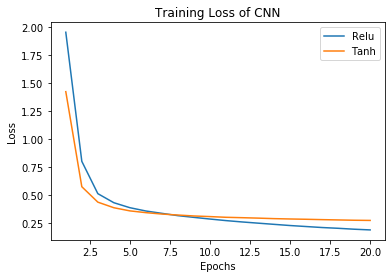

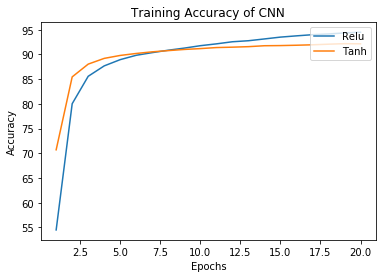

In [44]:
#Actvation compare

import matplotlib.pyplot as plt

figure1,bx = plt.subplots()

bx.plot([None]+loss_relu, label='Relu')
bx.plot([None]+loss_tanh, label='Tanh')
bx.set_title('Training Loss of CNN')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()

cx.plot([None]+acc_relu,label='Relu')
cx.plot([None]+acc_tanh,label='Tanh')
cx.set_title('Training Accuracy of CNN')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")



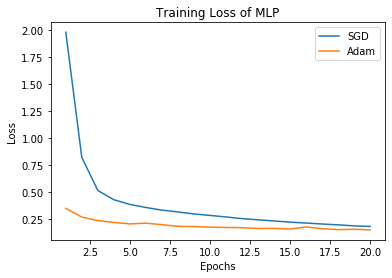

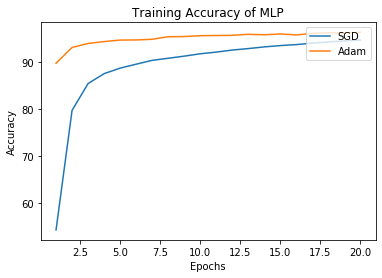

In [23]:
#Optimizer Compare
import matplotlib.pyplot as plt

figure1,bx = plt.subplots()

bx.plot([None]+loss_SGD, label='SGD')
bx.plot([None]+loss_Adam, label='Adam')
bx.set_title('Training Loss of MLP')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()

cx.plot([None]+acc_SGD,label='SGD')
cx.plot([None]+acc_Adam,label='Adam')
cx.set_title('Training Accuracy of MLP')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")



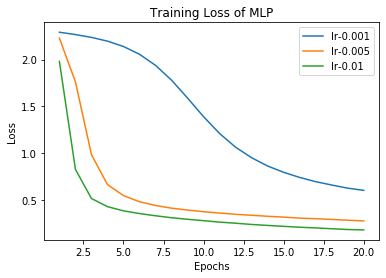

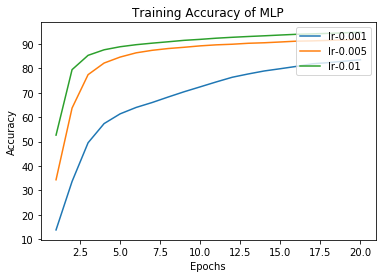

In [68]:
#learning rate compare
import matplotlib.pyplot as plt

figure1,bx = plt.subplots()
bx.plot([None]+loss_001, label='lr-0.001')
bx.plot([None]+loss_005, label='lr-0.005')
bx.plot([None]+loss_01, label='lr-0.01')

bx.set_title('Training Loss of MLP')
bx.set_xlabel('Epochs')
bx.set_ylabel('Loss')
bx.legend(loc="upper right")

figure,cx = plt.subplots()
cx.plot([None]+acc_001,label='lr-0.001')
cx.plot([None]+acc_005,label='lr-0.005')
cx.plot([None]+acc_01,label='lr-0.01')
cx.set_title('Training Accuracy of MLP')
cx.set_xlabel('Epochs')
cx.set_ylabel('Accuracy')
cx.legend(loc="upper right")

